In [22]:
!pip install pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [23]:
# Data handling and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Log message
print("All libraries have been successfully imported!")

All libraries have been successfully imported!


In [24]:
# Load the dataset
data = pd.read_csv('heart.csv')  # Ensure the file is in the same folder as your notebook

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
display(data.head())

# Log the shape of the dataset
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

First 5 rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


The dataset contains 1025 rows and 14 columns.


In [25]:
# Check for missing values
print("Checking for missing values:")
print(data.isnull().sum())

# Log message
print("No missing values found in the dataset!")

Checking for missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
No missing values found in the dataset!


In [26]:
# Display statistical summary
print("Statistical summary of the dataset:")
display(data.describe())

Statistical summary of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


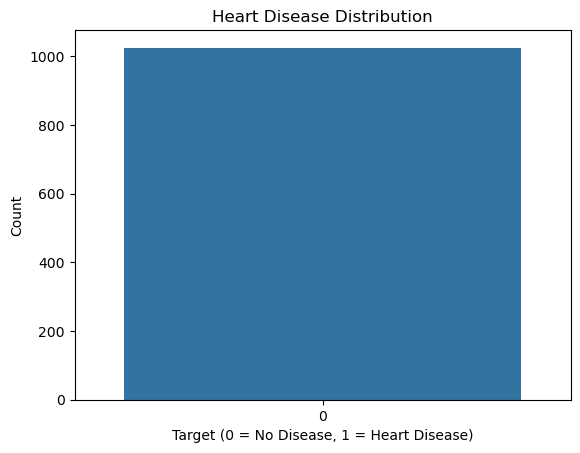

The chart shows the distribution of patients with and without heart disease.


In [27]:
# Plot the distribution of the target column
sns.countplot(data['target'])
plt.title("Heart Disease Distribution")
plt.xlabel("Target (0 = No Disease, 1 = Heart Disease)")
plt.ylabel("Count")
plt.show()
#این نمودار نشان می‌دهد که تعداد بیماران مبتلا به بیماری قلبی و غیرمبتلا تقریباً متعادل است.
# Log message
print("The chart shows the distribution of patients with and without heart disease.")

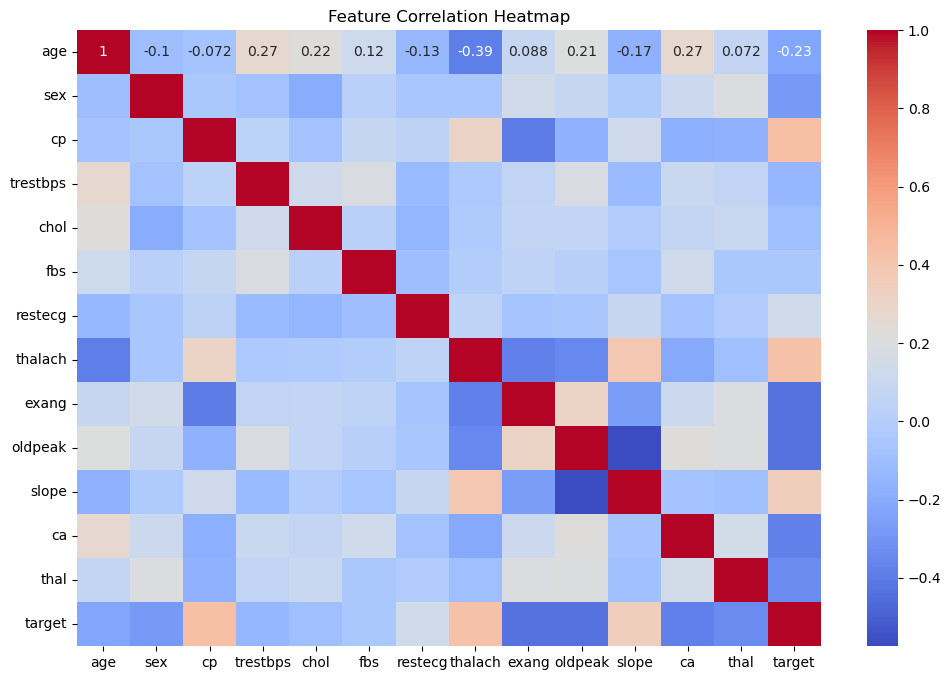

Correlation heatmap displayed successfully.


In [33]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
#ما با استفاده از نقشه حرارتی، ارتباط بین ویژگی‌های مختلف را بررسی کردیم. این کار به ما کمک می‌کند ویژگی‌هایی که بیشترین ارتباط را با بیماری قلبی دارند شناسایی کنیم.
# Log message
print("Correlation heatmap displayed successfully.")

In [29]:
# Split features and target
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Log message
print("Features and target separated successfully.")

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Log message
print("Feature scaling completed using StandardScaler.")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Log the shapes of the training and testing sets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Features and target separated successfully.
Feature scaling completed using StandardScaler.
Training set shape: (820, 13)
Testing set shape: (205, 13)


In [31]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 79.51%


Confusion Matrix:
[[73 29]
 [13 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



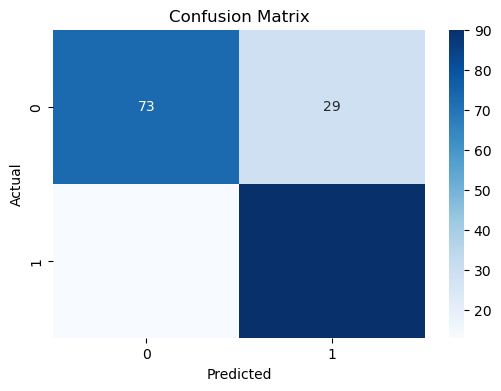

In [12]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
# Example patient data
example_patient = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])  # Example values
example_patient = scaler.transform(example_patient)  # Scale the input

# Predict
prediction = model.predict(example_patient)
print("Prediction for Example Patient:")
print("Heart Disease Detected" if prediction[0] == 1 else "No Heart Disease")

Prediction for Example Patient:
Heart Disease Detected
